In [1]:
import numpy as np
from docplex.mp.model import Model
import matplotlib.pyplot as plt

import sys
import os

In [2]:
# Define a problem:
rnd = np.random
rnd.seed(0)

n = 25
Q = 15
N = [i for i in range(1, n+1)]
V = [0] + N
q = {i:rnd.randint(1,10) for i in N}

loc_x = rnd.rand(len(V))*200
loc_y = rnd.rand(len(V))*100

A = [(i, j) for i in V for j in V if i!=j] # List of Arcs
c = {(i,j): round(np.hypot(loc_x[i]-loc_x[j], loc_y[i]-loc_y[j])) for i, j in A} # Dictionary of distances/costs

In [3]:
# Create a CPLEX model:
mdl = Model('CVRP')

In [4]:
# Define arcs and capacities:
x = mdl.binary_var_dict(A, name= 'x')
u = mdl.continuous_var_dict(N, ub= Q, name= 'u')

In [5]:
# Define objective function:
mdl.minimize(mdl.sumsq(c[i,j]*x[i,j] for i, j in A))

In [6]:
# Add constraints:
mdl.add_constraints(mdl.sum(x[i,j] for j in V if j != i) == 1 for i in N) # Each point must be visited
mdl.add_constraints(mdl.sum(x[i,j] for i in V if i != j) == 1 for j in N) # Each point must be left
mdl.add_indicator_constraints(mdl.indicator_constraint(x[i,j], u[i]+q[j] == u[j]) for i,j in A if i!=0 and j!=0)
mdl.add_constraints(u[i] >= q[i] for i in N)
mdl.parameters.timelimit = 15 # Add running time limit

In [7]:
# Solving model:
solution = mdl.solve(log_output=True)

Version identifier: 22.1.0.0 | 2022-03-09 | 1a383f8ce
CPXPARAM_Read_DataCheck                          1
CPXPARAM_TimeLimit                               15
Found incumbent of value 715482.000000 after 0.00 sec. (0.07 ticks)
Tried aggregator 2 times.
MIQP Presolve eliminated 25 rows and 72 columns.
MIQP Presolve modified 914 coefficients.
Aggregator did 264 substitutions.
Reduced MIQP has 354 rows, 867 columns, and 1978 nonzeros.
Reduced MIQP has 578 binaries, 0 generals, 0 SOSs, and 528 indicators.
Presolve time = 0.01 sec. (1.78 ticks)
Probing time = 0.02 sec. (4.25 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 354 rows, 867 columns, and 1978 nonzeros.
Reduced MIP has 578 binaries, 0 generals, 0 SOSs, and 528 indicators.
Presolve time = 0.01 sec. (1.79 ticks)
Classifier predicts products in MIQP should be linearized.
Probing time = 0.00 sec. (2.26 ticks)
Clique table members: 1406.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic 

   1878     0    32617.7000    78   293305.0000      Cuts: 63    27694   88.88%
   1878     0    32658.1429    72   293305.0000      Cuts: 26    27716   88.87%
   1878     0    32733.3333    57   293305.0000      Cuts: 66    27746   88.84%
   1878     0    32818.3455    72   293305.0000      Cuts: 83    27815   88.81%
   1878     0    32828.7797    72   293305.0000      Cuts: 71    27835   88.81%
   1878     0    32874.8714    66   293305.0000      Cuts: 24    27851   88.79%
   1878     0    32971.1636    68   293305.0000      Cuts: 94    27882   88.76%
   1878     0    33116.1250    65   293305.0000      Cuts: 50    27927   88.71%
   1878     0    33185.0000    51   293305.0000     Cuts: 117    27950   88.69%
   1878     0    33369.6429    78   293305.0000      Cuts: 42    28003   88.62%
   1878     0    33733.2500    63   293305.0000     Cuts: 100    28034   88.50%
   1878     0    33845.5429    67   293305.0000     Cuts: 116    28067   88.46%
   1878     0    33907.8095    72   2933

In [8]:
# print(solution)
print(solution.solve_status) # Returns if the solution is Optimal or just Feasible

JobSolveStatus.FEASIBLE_SOLUTION


In [9]:
active_arcs = [a for a in A if x[a].solution_value > 0.9]
print(active_arcs)

[(0, 5), (0, 8), (0, 10), (0, 13), (0, 14), (0, 16), (0, 17), (0, 18), (0, 20), (0, 21), (1, 0), (2, 24), (3, 6), (4, 0), (5, 9), (6, 0), (7, 23), (8, 7), (9, 0), (10, 4), (11, 0), (12, 0), (13, 1), (14, 22), (15, 0), (16, 11), (17, 15), (18, 25), (19, 0), (20, 12), (21, 0), (22, 3), (23, 2), (24, 0), (25, 19)]


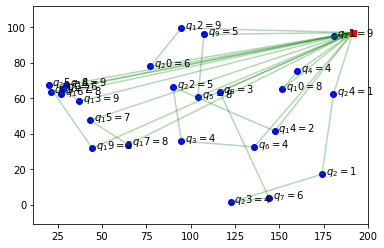

In [10]:
# Plot solution:
plt.scatter(loc_x[1:], loc_y[1:], c='b')
for i in N:
    plt.annotate('$q_%d=%d$'%(i,q[i]), (loc_x[i]+2,loc_y[i]))
for i, j in active_arcs:
    plt.plot([loc_x[i], loc_x[j]], [loc_y[i], loc_y[j]], c='g', alpha=0.3)
plt.plot(loc_x[0], loc_y[0], c='r', marker='s')
plt.axis('equal')
plt.show()